Populating the interactive namespace from numpy and matplotlib
Variance du premier degré de liberté =  3.05808195117
Variance du deuxième degré de liberté =  0.749188864309


`%matplotlib` prevents importing * from pylab and numpy


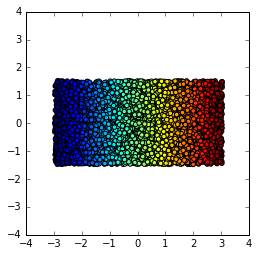

In [3]:
%pylab inline
from numpy.random import *
from numpy.linalg import *
from numpy import *
import matplotlib.pyplot as plot

# Génération de données avec 2 degrés de liberté (dimensionnalité intrinsèque de 2)
X = rand(5000,2) * array([6,3])
X -= X.mean(axis=0)

plot.figure(figsize=(4,4))
plot.scatter(X[:,0],X[:,1],c=X[:,0])
plot.axis('equal')
print ("Variance du premier degré de liberté = ",var(X[:,0]))
print ("Variance du deuxième degré de liberté = ",var(X[:,1]))

In [4]:
# On va projeter ces données en plus haute dimension (D=100)

# Génération d'une projection aléatoire.
# Chaque rangé de W correspond au vecteur de dimension D pour 
# une dimension intrinsèque (degré de liberté) différente.

# Vecteur pour le premier degré de liberté
w1 = ones(100)         # [1,1,1,1,...]
w1 /= sqrt(sum(w1**2))

# Vectuer pour le deuxième degré de liberté
# (orthogonal au premier)
w2 = (-1.)**arange(100) # [1,-1,1,-1,...]
w2 /= sqrt(sum(w2**2))

# Projection des données
W = array([w1,w2]) 
Y = dot(X,W)


Deux plus grandes valeurs propres:  [ 3.05853531  0.7487355 ]


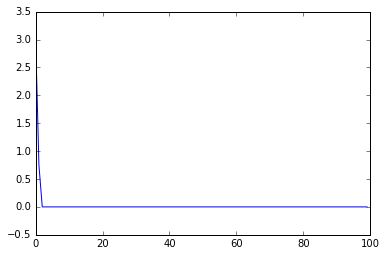

In [11]:
# Calcul de la projection de l'ACP

# Calcul la matrice de covariance empirique
Y_centered = Y - Y.mean(axis=0)
Sigma = dot(Y_centered.T,Y_centered)/Y.shape[0]

# Calcul les valeurs/vecteurs propres
lmbda, U = eigh(Sigma)

# Ordonne par ordre décroissant des valeurs propres
ii = (-lmbda).argsort()
lmbda = lmbda[ii]
U = U[:,ii]

plot.plot(range(len(lmbda)),lmbda)
print ("Deux plus grandes valeurs propres: ",lmbda[:2])

(-4.0, 4.0, -2.0, 2.0)

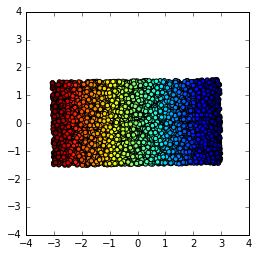

In [12]:
# Applique l'ACP en projetant sur les 2 vecteurs propres avec plus grandes valeurs propres
Xhat = dot(Y,U[:,:2])

plot.figure(figsize=(4,4))
plot.scatter(Xhat[:,0],Xhat[:,1],c=X[:,0])
plot.axis('equal')